# Практическая работа №1: Алгоритмы эффективного вычисления одночленов

Выполнил студент гр. 1304 Стародубов Максим. Вариант №24.

## Цель работы

Сформировать знания о работе алгоритмов вычисления одночленов за минимальное число операций, привить навык использования систем компьютерной математики для реализации алгоритмов.

## Основные теоретические положения

### Бинарный метод "SX"
Данный алгоритм вычисляет $x^n$, где $n$ - положительное целое число.<br>
Записать $n$ в двоичной системе счисления, затем в данной записи заменить каждую "1" парой букв "SX", заменить каждый "0" буквой "S", вычеркнуть первую пару "SX" в начале записи (слева). Результатом данных действий будет правило вычисления $x^n$, каждая "S" интерпретируется как операция возведения в квадрат (умножение промежуточного результата самого на себя), и "X" интерпретируется как операция умножения на $x$.

### Бинарный метод справа налево
Данный алгоритм вычисляет $x^n$, где $n$ - положительное целое число.<br>
#### A1. Инициализация.
Присвоить $N \leftarrow n$, $Y \leftarrow 1$, $Z \leftarrow x$.
#### A2. Уменьшить вдвое $N$.
(На данном шаге $x^n = Y \cdot Z^N$)
Присвоить $N \leftarrow \lfloor {N \over 2} \rfloor$, в то же время определить, являлось $N$ четным или нечетным. Если $N$ было четным, то перейти к шагу **A5**.
#### A3. Умножить $Y$ на $Z$.
Присвоить $Y \leftarrow Z \cdot Y$.
#### A4. Является ли $N = 0$.
Если $N = 0$, то алгритм завершает работу, $Y$ является ответом.
#### A5. Возвести $Z$ в квадрат.
Присвоить $Z \leftarrow Z \cdot Z$, и вернуться к шагу **A2**.

### Метод множителей
Данный алгоритм вычисляет $x^n$, где $n$ - положительное целое число.<br>
Метод мнжителей состоит в разложениии числа $n$ на множители. Если $n = p \cdot q$, где $p$ - наименьший простой множитель числа $n$ и $q > 1$, то возможно вычислить $x^n$, вычислив сначала x^p, а затем возведя это значение в степень $q$. Если $n$ - простое, то возможно сначала вычислить $x^{n-1}$, а затем домножить на $x$. И, конечно, если $n = 1$, получить $x^n$ возможно не производя никаких вычислений. Применение данных правил дает процедуру вычисления $x^n$, при любом данном значении $n$.

### Дерево степеней
Корнем дерева является узел 1, $(k + 1)$-ый уровень дерева определяется следующим образом, предполагается что первые $k$ уровней уже были построены: Берется каждый узел $n$ принадлежащий $k$-му уровню, слева направо, и к нему прикрепляются узлы $$n+1, n+a_1, n+a_2,...,n+a_{k-1} = 2n$$
(в данном порядке), где 1, $a_1$, $a_2$, ..., $a_{k-1}$ - путь от корня к узлу $n$; каждый узел, уже присутствующий в дереве, отбразывается.<br>
Чтобы вычислить $x^n$, необходимо найти вершину $n$ в дереве, путь от корня до $n$ определяет последовательность степеней, котоные необходимо вычислить для эффективно вычисления $x^n$.

## Постановка задачи

Реализовать алгоритмы вычисления мономов за минимальное число операций с использованием системы компьютерной алгебры SageMath, провести анализ алгоритмов. Полученные результаты содержательно интерпретировать.

## Выполнение работы


### 1. Бинарный метод "SX"
В блоке кода, расположенном ниже, реализован бинарный метод "SX".

In [1]:
'''
    this function performs the exponentiation of the passed number x to the power n using binary method
'''
def binary_method(x, n):
                            # convert the degree to binary and remove the leading "one"
    binary_representation = bin(n)[3:]
    binary_representation = binary_representation.replace('1', 'SX').replace('0', 'S')
    print(binary_representation)
    result = x
    power = 1
    
    for item in binary_representation:
        if item == 'S':
            result *= result
            power *= 2
        else:
            result *= x
            power += 1
        print('{}^{} = {}'.format(x, power, result))
    
    print('Number of operations:', len(binary_representation))
    return result

Произведены возведения чисел в сепень с помощью реализованной функции, результаты данных вычислений расположены в блоках кода ниже.

In [2]:
binary_method(3, 4)

SS
3^2 = 9
3^4 = 81
Number of operations: 2


81

In [3]:
binary_method(3, 8)

SSS
3^2 = 9
3^4 = 81
3^8 = 6561
Number of operations: 3


6561

In [4]:
binary_method(3, 6)

SXS
3^2 = 9
3^3 = 27
3^6 = 729
Number of operations: 3


729

In [5]:
binary_method(3, 9)

SSSX
3^2 = 9
3^4 = 81
3^8 = 6561
3^9 = 19683
Number of operations: 4


19683

In [6]:
binary_method(3, 11)

SSXSX
3^2 = 9
3^4 = 81
3^5 = 243
3^10 = 59049
3^11 = 177147
Number of operations: 5


177147

### 2. Метод возведения в степень справа налево
В блоке кода, расположенном ниже, реализован метод возведения в степень справа налево.

In [7]:
'''
    this function performs the exponentiation of the passed number x to the power n using right-to-left method
'''
def right_to_left(x, n):
    N = n
    Y = 1
    Z = x
    operations_amt = 0
    i = 0
    print('№\tN\tY\tZ')
    while True:
        print('{}\t{}\t{}\t{}'.format(i, N, Y, Z))
        i += 1
        flag = N % 2
        N //= 2
        if flag:
            Y *= Z
            operations_amt += 1
            if not N:
                break
        Z *= Z
        operations_amt += 1

    print('{}\t{}\t{}\t{}'.format(i,N, Y, Z))
    print('Number of operations:', operations_amt)
    return Y

Произведены возведения в степень чисел с помошью реализованной функции, результаты данных вычислений расположены в блоках кода ниже.

In [8]:
right_to_left(3, 4)

№	N	Y	Z
0	4	1	3
1	2	1	9
2	1	1	81
3	0	81	81
Number of operations: 3


81

In [9]:
right_to_left(3, 8)

№	N	Y	Z
0	8	1	3
1	4	1	9
2	2	1	81
3	1	1	6561
4	0	6561	6561
Number of operations: 4


6561

In [10]:
right_to_left(3, 6)

№	N	Y	Z
0	6	1	3
1	3	1	9
2	1	9	81
3	0	729	81
Number of operations: 4


729

In [11]:
right_to_left(3, 9)

№	N	Y	Z
0	9	1	3
1	4	3	9
2	2	3	81
3	1	3	6561
4	0	19683	6561
Number of operations: 5


19683

In [12]:
right_to_left(3, 11)

№	N	Y	Z
0	11	1	3
1	5	3	9
2	2	27	81
3	1	27	6561
4	0	177147	6561
Number of operations: 6


177147

В общем случае после завершеня работы алгоритма значение $Z$ будет равно $2^k$, где $k$ - наибольшее число, являющееся степенью числа $2$, меньше или равное переданной степени $n$.

### 3. Сравнение бинарного метода "SX" и метода возведения в степень справа налево.
В таблице ниже произведено сравнение количества операций умножения, произведенное реализованными методами для возведения в заданные степени переданных чисел.

| Степень | Число умножений в<br>бинарном методе | Число умножений в<br>методе справа налево |
|---------|--------------------------------------|-------------------------------------------|
| 4       | 2                                    | 3                                         |
| 8       | 3                                    | 4                                         |
| 6       | 3                                    | 4                                         |
| 9       | 4                                    | 5                                         |
| 11      | 5                                    | 6                                         |

Как видно из приведенной таблицы, метод возведения в степень справа налево совершает на одну операцию умножения больше, это связвно с тем, что инициалиация числа $Y$ начинается с 1, а не с переданного числа $x$, следовательно данный метод является менее эффективным.

### 4. Метод множителей

Рассмотим работу метода множителей для ранее приведенных $n$.
#### 1) $3^4$
$3^4 = (3^2)^2 = y_1^2 = y_1 \cdot y_1 = 9 \cdot 9 = 81$ <br>
$y_1 = 3^2 = 3 \cdot 3 = 9$
#### 2) $3^8$
$3^8 = (3^2)^4 = y_1^4 = (y_1^2)^2 = y_2^2 = y_2 \cdot y_2 = 81 \cdot 81 = 6561$ <br>
$y_1 = 3^2 = 3 \cdot 3 = 9$ <br>
$y_2 = y_1^2 = y_1 \cdot y_1 = 9 \cdot 9 = 81$
#### 3) $3^6$
$3^6 = (3^2)^3 = (y_1)^3 = y_1 \cdot y_1^2 = y_1 \cdot y_2 = 9 \cdot 81 = 729$ <br>
$y_1 = 3^2 = 3 \cdot 3 = 9$ <br>
$y_2 = y_1^2 = y_1 \cdot y_1 = 9 \cdot 9 = 81$
#### 4) $3^9$
$3^9 = (3^3)^3 = y_1^3 = y_1 \cdot y_1^2 = y_1 \cdot y_3 = 27 \cdot 729 = 19683$ <br>
$y_1 = 3^3 = 3 \cdot 3^2 = 3 \cdot y_2 = 3 \cdot 9 = 27$ <br>
$y_2 = 3^2 = 3 \cdot 3 = 9$ <br>
$y_3 = y_1^2 = y_1 \cdot y_1 = 27 \cdot 27 = 729$
#### 5) $3^{11}$
$3^11 = 3 \cdot 3^10 = 3 \cdot y_1 = 3 \cdot 59049 = 177147$ <br>
$y_1 = 3^10 = (3^2)^5 = y_2^5 = y_1 \cdot y_2^4 = y_2 \cdot y_3 = 9 \cdot 6561 = 59049$ <br>
$y_2 = 3^2 = 3 \cdot 3 = 9$ <br>
$y_3 = y_2^4 = (y_2^2)^2 = y_4^2 = y_4 \cdot y_4 = 81 \cdot 81 = 6561$ <br>
$y_4 = y_2^2 = y_2 \cdot y_2 = 9 \cdot 9 = 81$

Для рассмотренных степеней метод множителей дает такое же число умножений, что и бинарный метод "SX", однако существуют ситуации, когда метод множителей дает меньшее чило умножений, чем бинарный метод "SX", в качестве примера приведено вычисление $3^{15}$: <br>

$3^{15} = (3^3)^5 = y_1^5 = y_1 \cdot y_1^4 = y_1 \cdot y_3 = 27 \cdot 531441 = 14348907$ <br>
$y_1 = 3^3 = 3 \cdot 3^2 = 3 \cdot y_2 = 3 \cdot 9 = 27$ <br>
$y_2 = 3^2 = 3 \cdot 3 = 9$ <br>
$y_3 = y_1^4 = (y_1^2)^2 = y_4^2 = y_4 \cdot y_4 = 729 \cdot 729 = 531441$ <br>
$y_4 = y_1^2 = y_1 \cdot y_1 = 27 \cdot 27 = 729$

In [13]:
binary_method(3, 15)

SXSXSX
3^2 = 9
3^3 = 27
3^6 = 729
3^7 = 2187
3^14 = 4782969
3^15 = 14348907
Number of operations: 6


14348907

Также существуют ситуации, когда метод множителей дает большее число операций, чем бинарный метод "SX", в качестве примера рассмотрим вычисление $3^{33}$: <br>
$3^{33} = (3^3)^{11} = y_1^{11} = y_1 \cdot y_1^{10} = y_1 \cdot y_3 = 27 \cdot 205891132094649 = 5559060566555523$ <br>
$y_1 = 3^3 = 3 \cdot 3^2 = 3 \cdot y_2 = 3 \cdot 9 = 27$ <br>
$y_2 = 3^2 = 3 \cdot 3 = 9$ <br>
$y_3 = y_1^{10} = (y_2^2)^5 = y_4^5 = y_4 \cdot y_4 ^4 = y_4 \cdot y_5 = 729 \cdot 282429536481 = 205891132094649$ <br>
$y_4 = y_1^2 = y_1 \cdot y_1 = 27 \cdot 27 = 729$ <br>
$y_5 = y_4^4 = (y_4^2)^2 = y_6^2 = y_6 \cdot y_6 = 53144 \cdot 53144 = 282429536481$ <br>
$y_6 = y_4^2 = y_4 \cdot y_4 = 53144$

In [14]:
binary_method(3, 33)

SSSSSX
3^2 = 9
3^4 = 81
3^8 = 6561
3^16 = 43046721
3^32 = 1853020188851841
3^33 = 5559060566555523
Number of operations: 6


5559060566555523

Таким образом метод множителей, в среднем, дает меньшее число умножений, чем бинарные матоды, но существуют ситуации, при которых бинарные методы показывают лучший результат.

### 5. Дерево степеней
В блоке кода, расположенном ниже, реализован алгоритм "дерева степеней".

In [15]:
'''
    this function finds the path to a given vertex in the tree defined as a parent dictionary
'''
def get_way_to_root(parents, item):
    way_to_root = []
    current_item = item  
    while current_item:
        way_to_root.append(current_item)
        current_item = parents[current_item]
    return way_to_root


'''
    this function draws the passed tree defined as a parent dictionary, 
    the path to vertex searched_item is highlighted in green
'''
def show_tree(parents, target_degree):
    way_to_root = get_way_to_root(parents, target_degree)
    G = Graph()
    G.add_edges(list(parents.items()))
    G.delete_vertex(0)  # remove the dummy vertex
    G.plot(layout='tree', 
           tree_root=1, 
           edge_colors={(0, 1, 0): [(way_to_root[i], way_to_root[i+1], None) for i in range(len(way_to_root)-1)]}
          ).show()


'''
    this function builds the powers tree up to a target height
'''
def crate_powers_tree(target_height, target_degree=1, descending_flag=False):
    parents = {}
    parents[1] = 0      # 0 is a dummy vertex that allows you to pass the root element
    queue = []          # to build the tree its heights are traversed in width using the queue
    queue.append(1)
    height = 1
    
                        # the traversal direction (descending or ascending) is determined by descending_flag
    traversal = 1 if descending_flag else -1
    
                        # perform a traversal until the specified level is built
                        # or until a given degree is found
    while height < target_height or not target_degree in parents:
        height += 1
        for _ in range(len(queue)): # nested loop allows you to determine the change in tree height
            current_item = queue.pop(0)

            for item in get_way_to_root(parents, current_item)[::traversal]:
                        # look through the vertices that add up the path to the current vertex 
                        # starting from the root
                if item + current_item in parents:      
                    continue    # do not add vertices that are already in the tree
                parents[item + current_item] = current_item
                queue.append(item + current_item)

    show_tree(parents, target_degree)

Для сравнения данного метода с предыдущими, рассмотрим, сколько умножений необходимо для вычисления степеней 15 и 33. Отметим, что число умножений определяется высотой, на которой находится определенная степень.

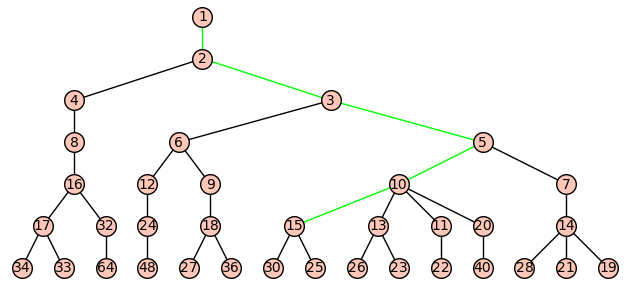

In [16]:
crate_powers_tree(7, target_degree=15)

Для вычисления 15-ой степени дерево степеней дает на одну операцию умножения меньше, чем бинарный метод "SX".

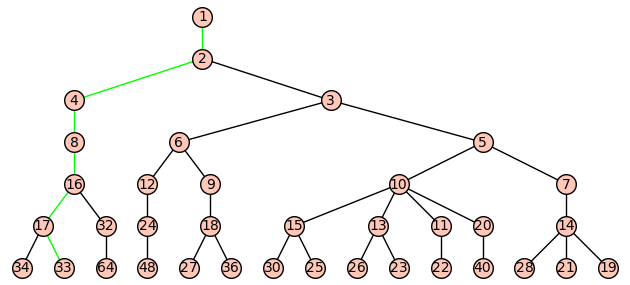

In [17]:
crate_powers_tree(7, target_degree=33)

Для вычисления 33-й степени дерево степенй дает на одну операцию умножения меньше, чем метод множителей.

В среднем для не слишком больших степеней $n$ ($n <= 100000$) дерево степеней дает результат лучше, чем бинарный метод "SX" и метод множителей. 

### 6. Дерево убывающих степеней

In [18]:
'''
    this function builds a descending degree tree up to a target height
'''
def create_descending_powers_tree(target_height, target_degree=1):
    crate_powers_tree(target_height, target_degree, True)

Таким же образом рассмотрим вычисление сепеней 15 и 33 и сравним результат с бинарным методом "SX". 

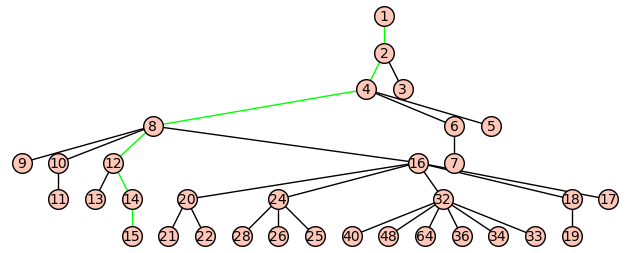

SXSXSX
3^2 = 9
3^3 = 27
3^6 = 729
3^7 = 2187
3^14 = 4782969
3^15 = 14348907
Number of operations: 6


14348907

In [19]:
create_descending_powers_tree(7, target_degree=15)
binary_method(3, 15)

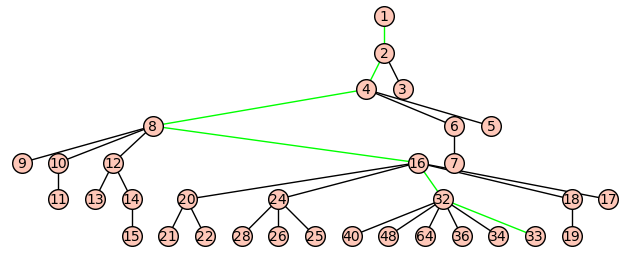

SSSSSX
3^2 = 9
3^4 = 81
3^8 = 6561
3^16 = 43046721
3^32 = 1853020188851841
3^33 = 5559060566555523
Number of operations: 6


5559060566555523

In [20]:
create_descending_powers_tree(7, target_degree=33)
binary_method(3, 33)

Как видно из данных вычислений, дерево убыващих степеней дает такое же число операций умножения, что и бинарный метод "SX".

## Выводы

В ходе выполнения работы рассмтрены следующие методы возведения числа в сепень: бинарный метод "SX", метод справа налево, метод множителей, дерево степеней, дерево убывающих степеней. Написаны программы, реализующие все данные методы, кроме метода множителей. Произведено сравнение данных методов, в результате чего показано, что бинарный метод "SX" всегда дает меньшее число умножений, чем метод справа налево, метод множителей в среднем дает меньшее число умножений, чем бинарный метод "SX", дерево степеней в среденем дает меньшее число операций умножения, чем метод множителей, древо убывающих степеней дает такое же число умножений, что и бинарный меод "SX".